## Demonstrate Visualization Software

Demo of how to run the visDiagnosticPlot module. 

In [1]:
%matplotlib notebook
import visDiagnosticPlots as vd
from importlib import reload
import pathlib
import pandas as pd


### Structure of vis

<li><b>vis.nIter</b>: total number of iterations</li>
<li><b>vis.fids</b>, <b>vis.goodIdx</b>, <b>vis.dots</b>: calibration information</li>
<li><b>vis.calibModel</b>: calibration model</li>
<li><b>vis.db</b>:  database connection</li>
<li><b>vis.convergeData</b> pandas dataframe with the convergence data</li>

<b>vis.loadConvergence(pfsVisitId)</b>

Load data from a convergence run into a pandas DF.  Loads all iterations, performs join between cobra_match and cobra_target to get meaured and target positions. 

<b>vis.visConvergenceHist(range=(0,0.08), bins=20)</b>

plot a histogram of distance to target for a sequence of iterations (ie, Chi-Hung's nice plots). 

<b>vis.visConvergenceMap(iterVal = None)</b>

plot a map of distance to the final target for all cobras. If iterVal is specified do for a specific iteration, otherwise for the last iteration. 

<b>vis.visConvergenceBool(iterVal = None, threshNon = 0.01, threshBad = 0.08)</b>

Plot a converged/non-converged map of the cobras. Three colours; converged, non-converged, and almost-converged, as specified by the thresholds. If  If iterVal is specified do for a specific iteration, otherwise for the last iteration. 

<b>vis.singleCobraMotion(self,cobraNum,hardStop = False, blackDots = False, badCob = True)</b>

Plot diagnostics for a single cobra, showing 2D motion and distance to target by iteration.  The points are colour coded by iteration in chromatic order from red -> purple

<b>vis.sequencePlot(centrePos = True, hardStop = False, blackDots = False, patrolRegion = True, ff = True)</b>

Plot all the cobra motions for a convergence sequence, same colour coding for spots as signleCobraMotions 

Optional overplots are: 

  <li><i>centrePos</i>: plot centres of cobra motion (default=True)</li>
  <li><i>blackDots</i>: black dot positions</li>
  <li><i>hardStop</i>: location of theta hardstops</li>
  <li><i>patrolRegion</i>: show bounds of patrol region (default=True)</li>
  <li><i>ff</i>: show location of fiducial fibres (default=True)</li>
  


## Initialize

To initialize, you need the location of the calibration files.

The initialization will read the cobra geometry, black dot positions, fiducial fibre positions and initialize the database connection. The location of the xml file and dot file are required, you can override the default DB parameters if desired. 

The PurePosixPath is needed for a reference to xmlFile.stem further down the code. 

In [3]:
dotFile = '/Users/karr/software/mhs/devel/pfs_instdata/data/pfi/dot/black_dots_mm.csv'
xmlFile=pathlib.PurePosixPath("/Users/karr/software/mhs/devel/pfs_instdata/data/pfi/modules/ALL/ALL_final_20210920_mm.xml")
visitId=68440

reload(vd)
vis = vd.VisDiagnosticPlot(xmlFile,dotFile,hostname = 'localhost', username = 'karr')


/Users/karr/software/mhs/devel/ics_cobraCharmer/python/ics/cobraCharmer/pfiDesign.py:285: RuntimeWarning: divide by zero encountered in true_divide
  self.S1Nm[i] = angularStep / np.array(list(map(float, slowJoint1Rev)))
/Users/karr/software/mhs/devel/ics_cobraCharmer/python/ics/cobraCharmer/pfiDesign.py:287: RuntimeWarning: divide by zero encountered in true_divide
  self.S2Nm[i] = angularStep / np.array(list(map(float, slowJoint2Rev)))
/Users/karr/software/mhs/devel/ics_cobraCharmer/python/ics/cobraCharmer/pfiDesign.py:289: RuntimeWarning: divide by zero encountered in true_divide
  self.F1Nm[i] = angularStep / np.array(list(map(float, fastJoint1Rev)))
2022-04-11T12:50:18.250 30 root       spectroIds.py:39 no dns.resolver library available, using "S"


## Load a convergence run

This loads the data (targets and moves) for a single convergence run specified by the visitId into a pandas dataframe. 

In [ ]:
reload(vd)
vis = vd.VisDiagnosticPlot(xmlFile,dotFile,hostname = 'localhost', username = 'karr')
vis.loadConvergence(visitId)

## Plot convergence map

In [ ]:
vis.visConvergenceMap()

## Plot Boolean Map

In [ ]:
vis.visConvergenceBool()

## Sequence Plot

Plots the whole field, showing the motion of the cobras for the convergece sequence. Optionally overplot the black dot locations, centre positions, patrol region, fiducial fibres and hard stops. 

In [ ]:
fig,ax = vis.sequencePlot(hardStop = True, blackDots = True, ff = True)

## Histograms 

plot histograms of the distance to the target for each iteration

In [ ]:

fig,ax=vis.visConvergenceHist()


## Plot a single cobra motion


2022-04-11T13:00:57.660 30 root       spectroIds.py:39 no dns.resolver library available, using "S"


<IPython.core.display.Javascript object>


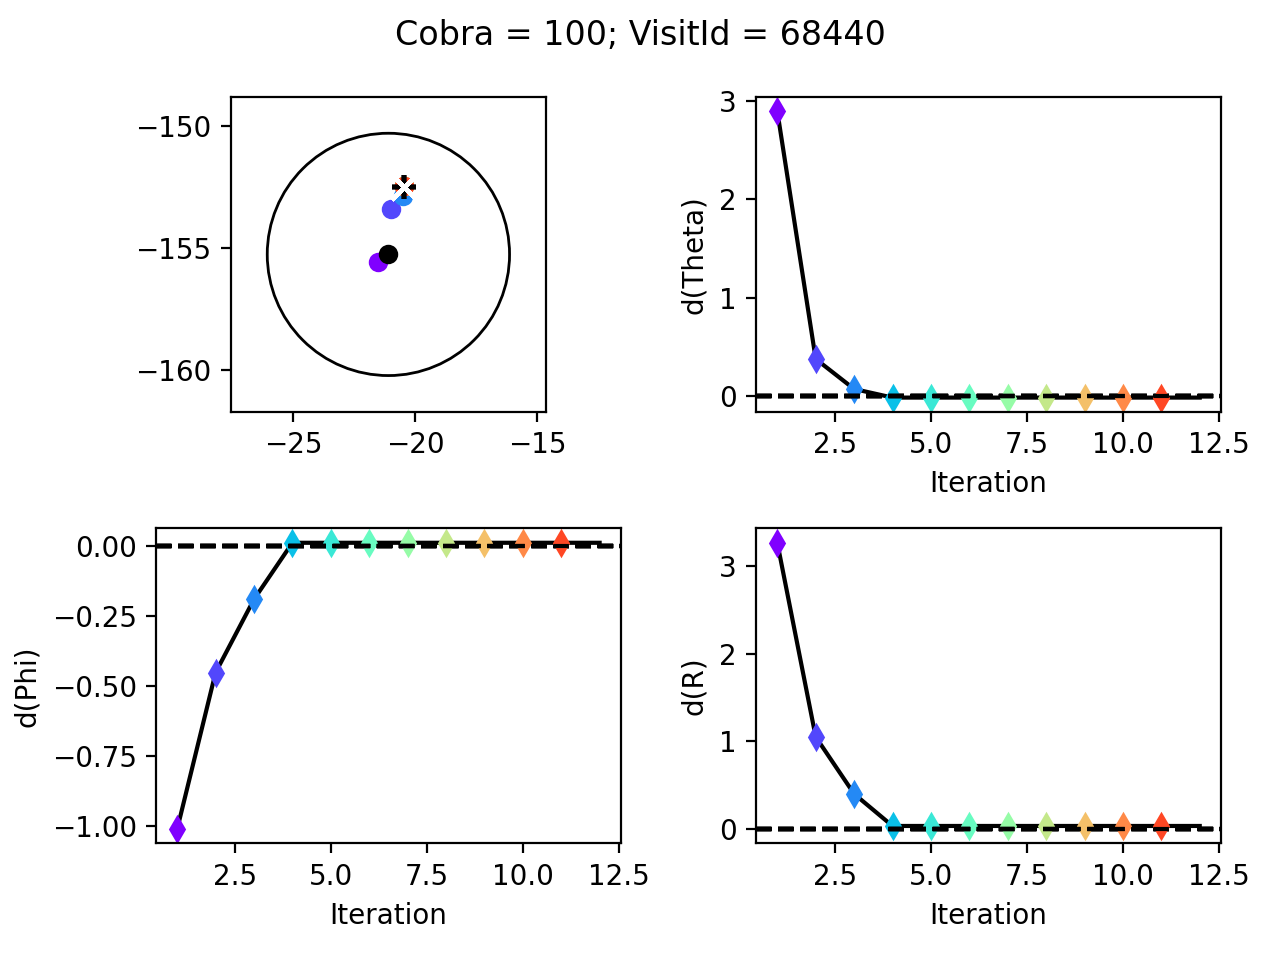

Cobra = 100; VisitId = 68440


NameError: name 'ax' is not defined

In [10]:
cobraNum = 100
reload(vd)
vis = vd.VisDiagnosticPlot(xmlFile,dotFile,hostname = 'localhost', username = 'karr')
vis.loadConvergence(visitId)
vis.singleCobraMotion(cobraNum,saveFile = True)

In [ ]:
nIter = 12
cmap = plt.get_cmap('rainbow')
colSeq = cmap(np.linspace(0, 1, nIter))

In [ ]:
from matplotlib.colors import to_hex

In [ ]:
cols=[]
for i in range(nIter):
    cols.append(to_hex(colSeq[i]))
    

In [ ]:
cols

In [ ]:
fig,ax = plt.subplots()
ind = vis.goodIdx

armLength = vis.calibModel.L1 + vis.calibModel.L2
        
for i in ind:
            
    circle=plt.Circle((vis.calibModel.centers[i].real, vis.calibModel.centers[i].imag),armLength[i],fill=False,color='black')
    a=ax.add_artist(circle)
ax.set_xlim([-100,100])
ax.set_ylim([-100,100])

In [ ]:
theta, phi = vis.calibModel.centers[i].real

In [ ]:
from ics.cobraCharmer import pfiDesign
from ics.cobraCharmer import pfi 
from ics.cobraCharmer import func


In [ ]:
pfiM = pfi.PFI(doLoadModel=False,
    doConnect=False)
theta,phi,flag=pfiM.positionsToAngles(allCobras[vis.goodIdx],vis.calibModel.centers[vis.goodIdx])

In [ ]:
import numpy as np
cobras=[]
for i in vis.calibModel.findAllCobras():
    c = func.Cobra(vis.calibModel.moduleIds[i],
                vis.calibModel.positionerIds[i])
    cobras.append(c)
    allCobras = np.array(cobras)
    nCobras = len(allCobras)


In [ ]:
theta, phi = vis.calibModel.centers[i].real

In [ ]:
theta

In [ ]:
cobraNum=100
filterInd = vis.convergeData['cobra_id'] == cobraNum
cM = vis.convergeData[filterInd]

In [ ]:
cM

In [ ]:
        xM = cM['pfi_center_x_mm'].values
        yM = cM['pfi_center_y_mm'].values
        xT = cM['pfi_target_x_mm'].values
        yT = cM['pfi_target_y_mm'].values
        pM, tM = vis.getAnglesOld(xM, yM, cobraNum)
        pT, tT = vis.getAnglesOld(xT, yT, cobraNum)


In [ ]:
len(vis.colSeq),len(xM)